# Data Science

# Create and analyze your own dataset

## Step 2

## Dataset analysis  

## Python, Pandas, Numpy & Matplotlib

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Open log file to know the structure and explore first rows.

In [2]:
df = pd.read_csv("log_temp.log")
df.head()

,2019-03-14 19:33:07 T=22.0 H=20.0
0,2019-03-14 19:38:10 T=22.0 H=20.0
1,2019-03-14 19:43:11 T=22.0 H=26.0
2,2019-03-14 19:48:14 T=22.0 H=26.0
3,2019-03-14 19:53:15 T=22.0 H=20.0
4,2019-03-14 19:58:15 T=22.0 H=23.0


The file is not corrupted, no header and delimited by " ".

Open log file delimited by " " without header.

In [3]:
df = pd.read_csv("log_temp.log", sep=" ", header=None)
df.head()

,0,1,2,3
0,2019-03-14,19:33:07,T=22.0,H=20.0
1,2019-03-14,19:38:10,T=22.0,H=20.0
2,2019-03-14,19:43:11,T=22.0,H=26.0
3,2019-03-14,19:48:14,T=22.0,H=26.0
4,2019-03-14,19:53:15,T=22.0,H=20.0


Asign column names.

In [4]:
df.columns = ["date", "hour", "temp", "humi"]
df.head()

,date,hour,temp,humi
0,2019-03-14,19:33:07,T=22.0,H=20.0
1,2019-03-14,19:38:10,T=22.0,H=20.0
2,2019-03-14,19:43:11,T=22.0,H=26.0
3,2019-03-14,19:48:14,T=22.0,H=26.0
4,2019-03-14,19:53:15,T=22.0,H=20.0


Explore number of entries, NaN values and column data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
date    336 non-null object
hour    336 non-null object
temp    336 non-null object
humi    320 non-null object
dtypes: object(4)
memory usage: 10.6+ KB


Column humi has 16 NaN values, however there is something wrong because temp column does not have any NaN value,  a greater exploration of the information is necessary.

In [6]:
df.describe(include="all")

,date,hour,temp,humi
count,336,336,336,320
unique,3,331,25,22
top,2019-03-15,23:08:46,T=21.0,H=21.0
freq,285,2,41,52


There are records for three dates, however the anlalysis should be focused on one date only.

In [7]:
df["date"].value_counts()

2019-03-15    285
2019-03-14     49
2019-03-16      2
Name: date, dtype: int64

The date that has more records is 2019-03-15, analysis should be focused on it.

In [8]:
df["temp"].value_counts()

T=21.0    41
T=19.0    40
T=18.0    35
T=22.0    32
T=20.0    29
T=16.0    25
T=23.0    25
T=17.0    24
error     16
T=30.0    12
T=15.0    11
T=34.0     7
T=24.0     7
T=35.0     7
T=31.0     5
T=33.0     3
T=32.0     3
T=27.0     3
T=28.0     2
T=25.0     2
T=29.0     2
T=36.0     2
T=9.0      1
T=26.0     1
T=37.0     1
Name: temp, dtype: int64

There are 16 records as error, these records should be converted to NaN values.

In [9]:
df["humi"].value_counts()

H=21.0     52
H=22.0     49
H=20.0     45
H=19.0     28
H=23.0     21
H=24.0     21
H=26.0     18
H=28.0     13
H=27.0     12
H=16.0     11
H=15.0      9
H=25.0      7
H=14.0      7
H=13.0      7
H=17.0      6
H=18.0      4
H=30.0      3
H=29.0      2
H=33.0      2
H=37.0      1
H=12.0      1
H=140.0     1
Name: humi, dtype: int64

Select records of date 2019-03-15 only.

In [10]:
df = df[df.date=="2019-03-15"]

Verify the dataset.

In [11]:
df["date"].value_counts()

2019-03-15    285
Name: date, dtype: int64

Replace error records with NaN values.

In [12]:
df = df.replace("error",np.NaN)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 49 to 333
Data columns (total 4 columns):
date    285 non-null object
hour    285 non-null object
temp    269 non-null object
humi    269 non-null object
dtypes: object(4)
memory usage: 11.1+ KB


All NaN values will be replaced with 0000.0 to be identified.

In [14]:
df = df.fillna("0000.0")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 49 to 333
Data columns (total 4 columns):
date    285 non-null object
hour    285 non-null object
temp    285 non-null object
humi    285 non-null object
dtypes: object(4)
memory usage: 11.1+ KB


Select the hour of the date column.

In [16]:
df["hour"] = df["hour"].str.slice(stop=2)

Select the numeric value of temp and humi columns.

In [17]:
df["temp"] = df["temp"].str.slice(start=2,stop=6)

In [18]:
df["humi"] = df["humi"].str.slice(start=2,stop=6)

In [19]:
df.head()

,date,hour,temp,humi
49,2019-03-15,00,19.0,33.0
50,2019-03-15,00,19.0,22.0
51,2019-03-15,00,19.0,21.0
52,2019-03-15,00,20.0,23.0
53,2019-03-15,00,19.0,21.0


Because date column has a single value, it is not necessary.

In [20]:
df=df.drop("date",1)
df.head()

,hour,temp,humi
49,00,19.0,33.0
50,00,19.0,22.0
51,00,19.0,21.0
52,00,20.0,23.0
53,00,19.0,21.0


Reset the index of the DataFrame.

In [21]:
df.reset_index(drop=True,inplace=True)
df.head()

,hour,temp,humi
0,00,19.0,33.0
1,00,19.0,22.0
2,00,19.0,21.0
3,00,20.0,23.0
4,00,19.0,21.0


Review column data types.

In [22]:
df.dtypes

hour    object
temp    object
humi    object
dtype: object

Convert each column to the correct data type in order to manage numeric values.

In [23]:
df.hour = df.hour.astype(int)
df.temp= df.temp.astype(float)
df.humi = df.humi.astype(float)

In [24]:
df.dtypes

hour      int64
temp    float64
humi    float64
dtype: object

At this point the dataset has 00.0 values as substitutes for NaN values, lets graph the dataset in order to visualize it and make later decisions.

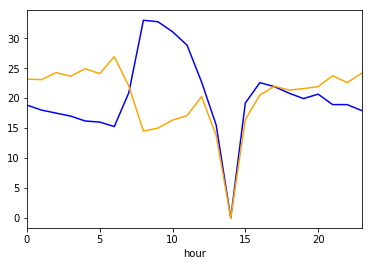

In [25]:
df.groupby("hour")["temp"].mean().plot(kind="line",color="blue")
df.groupby("hour")["humi"].mean().plot(kind="line",color="orange")

There are 00.0 values that should be replaced, however a decision must be made. In my opinion 00.0 values should be replaced with the mean of the column in the case that the first value will be 00.0 or with the value that precedes it, as it may apply.

In [26]:
#Two columns to review
columns = ["temp","humi"]
#Identify the 00.0 as the value to replace
flag = 00.0

#For each two columns, get and save the mean value of the column as a temp value in the case that the first 
#value will be 00.0, otherwise save the first value of the column as a temp value to replace in case of 00.0
for each in columns:
    if df[each].iloc[0] == flag:
        temp_t = df[each].mean()
    else:
        temp_t = df[each].iloc[0]
#In case of 00.0 replace with the temp value, otherwise update the temp value with the current value of the column
    for index, row in df.iterrows():
        if row[each] == flag:
            df.loc[index, each] = temp_t
        else:
            temp_t = df[each].iloc[index]        

In [27]:
df.describe()

,hour,temp,humi
count,285.000000,285.000000,285.000000
mean,11.508772,21.635088,21.326316
std,6.953373,5.281528,3.951579
min,0.000000,15.000000,12.000000
25%,6.000000,18.000000,19.000000
50%,11.000000,21.000000,21.000000
75%,18.000000,23.000000,24.000000
max,23.000000,37.000000,37.000000


Now it is time to visualize the data

Text(0, 0.5, '°C / RH')

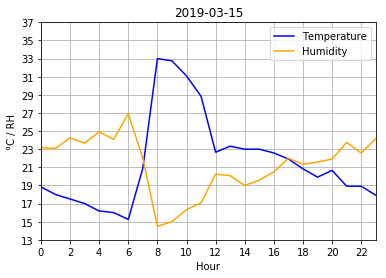

In [28]:
df.groupby("hour")["temp"].mean().plot(kind="line",color="blue")
df.groupby("hour")["humi"].mean().plot(kind="line",color="orange")

xint2 = np.arange(df["hour"].min(), df["hour"].max()+1, 2)
plt.xticks(xint2)
yint2 = np.arange(df["temp"].min()-2, df["temp"].max()+2, 2)
plt.yticks(yint2)

plt.grid()
plt.title("2019-03-15")
plt.legend(("Temperature","Humidity"))
plt.xlabel("Hour")
plt.ylabel("°C / RH")

### Results

On March 15, 2019 somewhere in the world there was a temperature range between 15°C and 33°C, at 6 am was the minimum temperature and the maximum at 8 am, the graph shows temperature and humidity as a mean for each hour of the day.

One important fact was that the temperature increased 18°C approximately in two hours, from 6 am to 8 am. The minimum humidity was at 8 am and at this time was the maximum temperature. 

In this case there was a minimum amount of records, however you could adjust the frecuency and get more records. A machine learning analysis could be developed as soon as you get more data. 

Thanks!